<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/main/fyp_wpf_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# !pip install -q dash
# !pip install  jupyter-dash
# !pip install -q dash_core_components
# !pip install -q dash_html_components
# !pip install -q dash_table
# !pip install pyngrok --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from google.colab import files
import io

import plotly.express as px
import plotly.graph_objects as go

''' import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 
 '''

' import dash\nimport dash_core_components as dcc\nimport dash_html_components as html\nfrom dash.dependencies import Input, Output \n '

In [2]:
data = files.upload()

Saving S6 10 seconed data (1).csv to S6 10 seconed data (1).csv


In [11]:
df = pd.read_csv(io.StringIO(data['S6 10 seconed data (1).csv'].decode('utf-8')))


In [12]:
df

,Date & Time,Frequency Hz,Voltage R Phase V,Voltage S Phase V,Voltage T Phase V,Current R Phase A,Current S Phase A,Current T Phase A,Wind Speed m/s,Active Power kW,Reactive Power kVAR,Generator RPM,Hydraulic unit Pressure in bar,Ambient Temperature,Nacelle Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE
0,FECHA_HORA,SSV_5SM_006_XS_FRQ_MEDI,SSV_5SM_006_XS_TNS_FASR,SSV_5SM_006_XS_TNS_FASS,SSV_5SM_006_XS_TNS_FAST,SSV_5SM_006_XS_INT_FASR,SSV_5SM_006_XS_INT_FASS,SSV_5SM_006_XS_INT_FAST,SSV_5SM_006_XS_VEL_WIND,SSV_5SM_006_XS_POT_MEDI,SSV_5SM_006_XS_POT_REAC,SSV_5SM_006_XS_VEL_LGMD,SSV_5SM_006_XS_PRS_PRPL,SSV_5SM_006_XS_TMP_0004,SSV_5SM_006_XS_TMP_V006,SSV_5SM_006_XS_TMP_V007,SSV_5SM_006_XS_TMP_V008,SSV_5SM_006_XS_TMP_V003,SSV_5SM_006_XS_TMP_V004,SSV_5SM_006_XS_TMP_V005,SSV_5SM_006_XS_TMP_V002,SSV_5SM_006_XS_TMP_V001,SSV_5SM_006_XS_TMP_0008,SSV_5SM_006_XS_TMP_0007
1,24/06/2021 00:00:00,50.27,590.5,588.6,585.7,435.7,427.5,426.6,10.4,737.8,1.3,1486.6,166.7,31.6,34.2,70.2,79.7,139.9,132.9,138.1,53.3,43.9,74.6,72.4
2,24/06/2021 00:00:10,50.26,585.6,587.4,591.3,418.9,413.6,410.7,11.4,745.5,1.7,1482.2,180.3,31.4,34.3,69.5,79.9,139.1,132.5,138.1,53.6,43.8,74.5,72.6
3,24/06/2021 00:00:20,50.24,591.8,589.5,586.5,429.8,425.6,421.3,10.2,732.7,8.2,1500,166.8,31.4,34.3,69.6,79.9,139.8,133.4,138.2,53.6,43.9,74.5,72.7
4,24/06/2021 00:00:30,50.22,591.1,588.5,584.5,425.9,427.1,441.2,10.1,743.1,8.4,1493.2,167.4,31.4,34.3,70.2,79.7,139.5,133.2,137.8,53.7,43.9,74.6,72.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,24/06/2021 23:59:10,50.04,581.8,580.3,581.1,236.1,237,236.7,7.9,404.2,-7.2,1468.4,179.8,31,32.3,60.8,73.4,95.2,90.9,95.9,53.6,43.7,61.8,65.4
8637,24/06/2021 23:59:20,50.12,580.4,581,583.2,217.6,221.4,220.9,7.4,367.3,8.5,1426.5,162.7,31,32.3,61.3,73.8,95,89.4,95,53.6,43.7,61.8,65.2
8638,24/06/2021 23:59:30,50.08,578.3,583.7,580.9,195.9,196.9,191.6,7.7,329.3,-23.3,1425.1,169.7,31,32.2,60.5,73.6,94,90.4,94.1,53.8,43.7,61.9,65.3
8639,24/06/2021 23:59:40,50.1,582.5,577.5,576.7,270.7,272.2,268,8.4,465.7,-0.8,1512.8,177.4,30.9,32.2,61.4,73.6,95.2,90.7,94.9,53.7,43.6,62,65.3


In [13]:
df = df.drop([0])

df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df["Active Power kW"] = pd.to_numeric(df["Active Power kW"], downcast="float")
df["Wind Speed m/s"] = pd.to_numeric(df["Wind Speed m/s"], downcast="float")

def hr_func(ts):
    return ts.hour
    
df["Hour"] = pd.to_numeric(df['Date & Time'].apply(hr_func), downcast="float")


In [14]:
df.shape

(8640, 25)

**Convert 10 seconds data to 10 min data by takin averages for 10 min**

In [19]:
active_power=df['Active Power kW']
active_power=np.array(active_power)

ac_pw = list() #ac_pw is the list containing 10 min wind power data
sume = 0
for i in range(len(active_power)):
  sume = sume+active_power[i]
  if(i%60==0):
    ac_pw.append(sume/60)
    sume = 0

len(ac_pw)

144

In [20]:
ac_pw=pd.DataFrame(ac_pw)
ac_pw

,0
0,12.296666
1,736.111668
2,719.211669
3,698.299997
4,738.143335
...,...
139,303.263334
140,343.985001
141,382.095000
142,380.231666


**Array of Active Power kW**




In [ ]:
''' active_power=df['Active Power kW']
active_power=np.array(active_power)
active_power=pd.DataFrame(active_power) 
ac_pw=ac_pw[0:100]
ac_pw
active_power.head()
active_power.shape '''

**Graph of time vs Active_power**

In [ ]:
fig = px.line(df, x="Date & Time" , y="Generator RPM") 
fig.show()

***Statistics of Data***




In [21]:
ac_pw.describe()

,0
count,144.000000
mean,551.140845
std,144.424533
min,12.296666
25%,425.600000
50%,605.426669
75%,664.274999
max,738.143335


**Trainind and testing data set and their statistics**

In [22]:
train,test=ac_pw[:-44],ac_pw[-44:]  #seperate train and test data arrays
print(train.shape)
print(test.shape)

print(train.describe())
print(test.describe())

(100, 1)
(44, 1)
                0
count  100.000000
mean   608.462683
std    118.279953
min     12.296666
25%    563.558752
50%    631.120834
75%    697.873748
max    738.143335
                0
count   44.000000
mean   420.863939
std    110.219936
min    273.120000
25%    343.580417
50%    380.247500
75%    478.084167
max    680.300001


**Autocorrelation**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
pyplot=plot_acf(train)
pyplot.set_size_inches(15,12)
pyplot.show()

**Trends,Seasons and Noise of the time series data**

<Figure size 432x288 with 0 Axes>

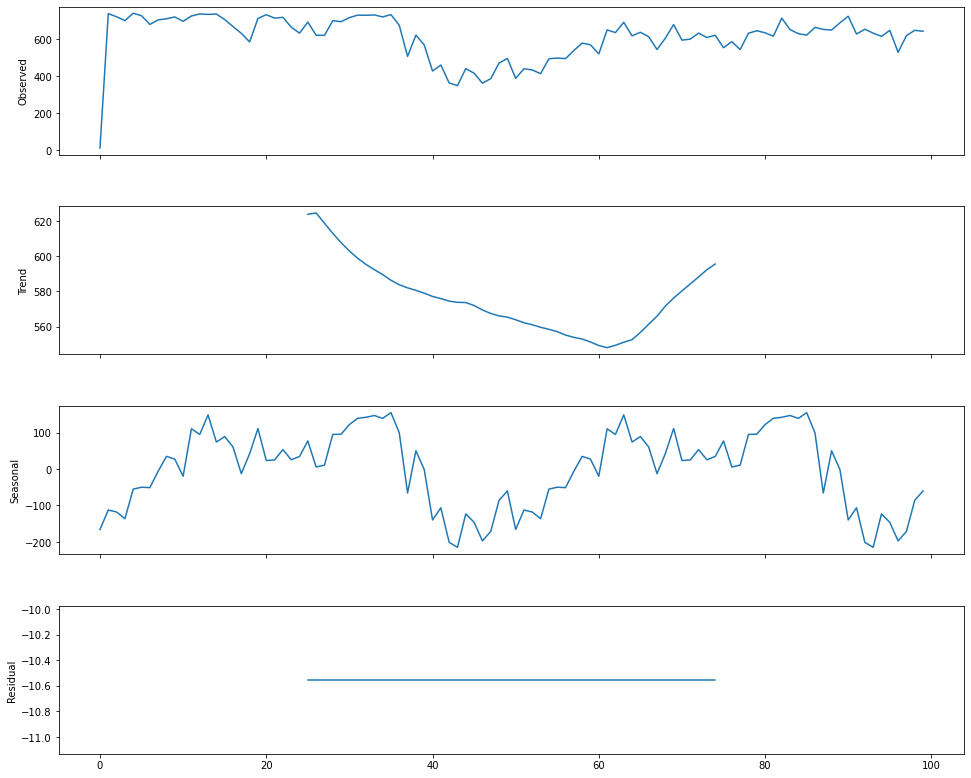

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='additive',freq=50)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,12)

**Autocorrealation and Partial aurocorrealations plots**

plot the ACF and PACF to know about P and Q value



 

*   Statistical correlation summarizes the strength of the relationship between two variables
*   ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot

*   ACF Determines the coefficient of MA model (p)
*   PACF is a partial auto-correlation function which is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed .Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals

*   PACF determines the coefficients of AR model (q)

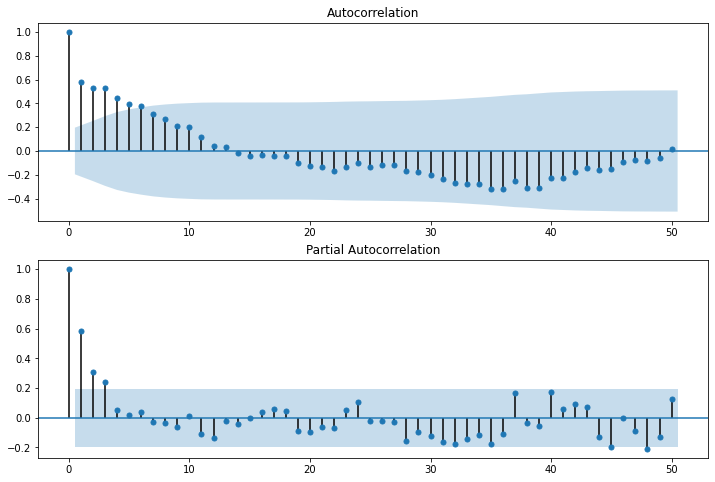

In [26]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train[0], lags=50, ax=ax1) 
# 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train[0], lags=50, ax=ax2)

**Checking stationarity**


1.   By seeeing them
2.   Summary statistics(Mean and Variance)
3.   Statistical tests






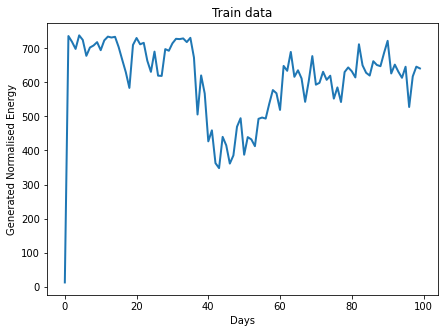

In [27]:
#By Seeing Plot
plt.figure(figsize = (7,5))
plt.plot(train,linewidth = 2)
plt.title("Train data")
plt.xlabel("Days")
plt.ylabel("Generated Normalised Energy")
plt.show()

In [28]:
# Summarry Statistics
split = round(len(ac_pw) / 2)
X1, X2 = ac_pw[0:split], ac_pw[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=600.081157, mean2=502.200532
variance1=18555.832482, variance2=18597.062361


In [34]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ValueError: ignored